## Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:

ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer ($000)

ZIP Code: Home Address ZIP

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month ($000)

Education: 
    Education Level. 
        1: Undergrad; 
        2: Graduate; 
        3: Advanced/Professional
        
Mortgage: Value of house mortgage if any. ($000)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by the bank?
 
 

### Objective:

#### The classification goal is to predict the likelihood of a liability customer buying personal loans.

 

### Steps and tasks:
    

#### Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. 

In [636]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



In [637]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [638]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [639]:
df.shape

(5000, 14)

In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [641]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<AxesSubplot:xlabel='Mortgage'>

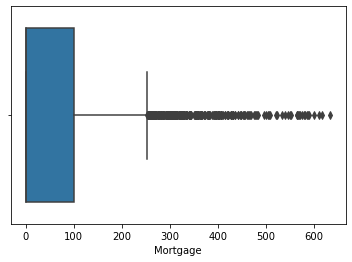

In [642]:
sns.boxplot(data=df, x='Mortgage')

<AxesSubplot:xlabel='Age'>

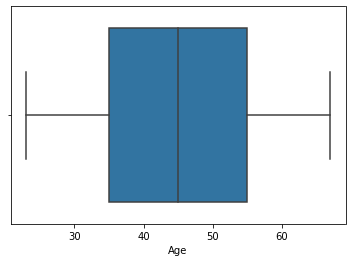

In [643]:
sns.boxplot(data=df, x='Age')

<AxesSubplot:xlabel='Income'>

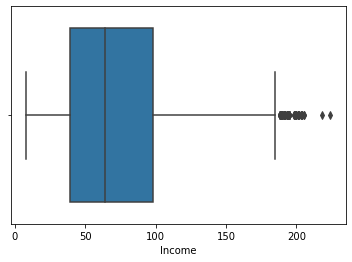

In [644]:
sns.boxplot(data = df, x = 'Income')

#### Observered
- All columns are numerical, integers
- The experience columns has a min value of -3, which means there are some incorrect data
- Mortgage is highly right skewed
- Income is right skewed

In [645]:
    
exp = df [ (df['Experience'] <= 0) ]

In [646]:
exp.shape

(118, 14)

In [647]:
exp.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.3,3,0,0,0,0,0,1
105,106,24,0,35,94704,3,0.1,2,0,0,1,0,1,0
151,152,26,0,132,92834,3,6.5,3,0,1,0,0,0,1
155,156,24,0,60,94596,4,1.6,1,0,0,0,0,1,0
156,157,26,0,15,92131,4,0.4,1,0,0,0,0,0,1


#### Lets check the relation between experience and age 

In [648]:
df['Age'].corr(df['Experience'])

0.994214856968332

### Data Cleanup
##### Since Age and Experience are highly co-related we can drop the experience column 


##### Similary,zip code and ID can be dropped as well as they are not useful in the analysis

In [649]:

df_data = df.drop(['Experience','ZIP Code','ID'], axis=1)
                  

In [650]:
df_data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


## EDA: Study the data distribution in each attribute and target variable, share your findings 

- Number of unique in each column?

- Number of people with zero mortgage?

- Number of people with zero credit card spending per month?

- Value counts of all categorical columns.

- Univariate and Bivariate

#### How many people did take personal loan (we know this already from the question set, although just to validate)

In [651]:
df_data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

#### Number of unique in each column?

In [652]:
df_data.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

#### Number of people with zero mortgage?

In [653]:
(df_data['Mortgage'] ==0 ).sum()

3462

#### Number of people with zero credit card spending per month?

In [654]:
 ( df_data['CCAvg'] == 0).sum()

106

#### Value counts of all categorical columns.

In [655]:
for column in ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']:
    print(df_data[column].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



### Univariate and Bivariate Analysis / Understanding the relation between columns

In [656]:
pd.crosstab(df_data['Education'], df['Personal Loan'])

Personal Loan,0,1
Education,,
1,2003,93
2,1221,182
3,1296,205


<AxesSubplot:xlabel='Education', ylabel='count'>

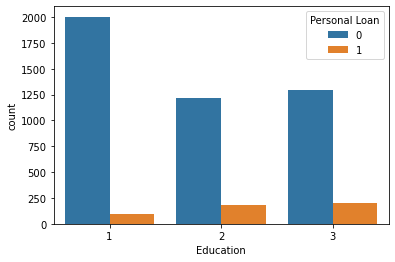

In [657]:
sns.countplot(data = df_data, x='Education', hue='Personal Loan')

In [658]:
pd.crosstab(df_data['Family'], df['Personal Loan'])

Personal Loan,0,1
Family,,
1,1365,107
2,1190,106
3,877,133
4,1088,134


<AxesSubplot:xlabel='Family', ylabel='count'>

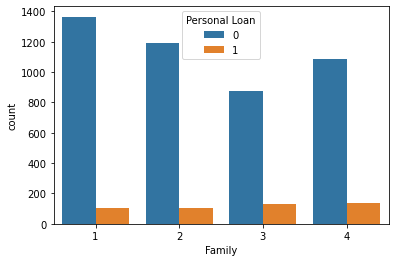

In [659]:
sns.countplot(data = df_data, x='Family', hue='Personal Loan')

In [660]:
pd.crosstab(df_data['Securities Account'], df['Personal Loan'])

Personal Loan,0,1
Securities Account,,
0,4058,420
1,462,60


<AxesSubplot:xlabel='Securities Account', ylabel='count'>

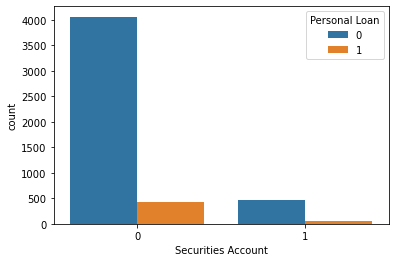

In [661]:
sns.countplot(data = df_data, x='Securities Account', hue='Personal Loan')

In [662]:
pd.crosstab(df_data['CD Account'], df['Personal Loan'])

Personal Loan,0,1
CD Account,,
0,4358,340
1,162,140


<AxesSubplot:xlabel='CD Account', ylabel='count'>

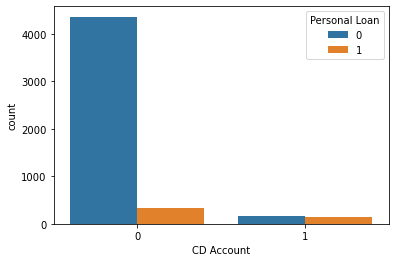

In [663]:
sns.countplot(data = df_data, x='CD Account', hue='Personal Loan')

In [664]:
pd.crosstab(df_data['Online'], df['Personal Loan'])

Personal Loan,0,1
Online,,
0,1827,189
1,2693,291


<AxesSubplot:xlabel='Online', ylabel='count'>

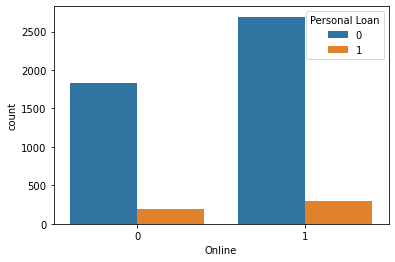

In [665]:
sns.countplot(data = df_data, x='Online', hue='Personal Loan')

In [666]:
pd.crosstab(df_data['CreditCard'], df['Personal Loan'])

Personal Loan,0,1
CreditCard,,
0,3193,337
1,1327,143


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

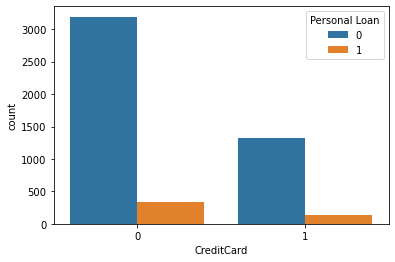

In [667]:
sns.countplot(data = df_data, x='CreditCard', hue='Personal Loan')

In [668]:
df_data.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [669]:
bins = [23, 35, 45, 56, 68]
age_labels = ['23-35','36-45', '46-55','56-68']

df_data["Age_cat"] = pd.cut(df_data.Age, bins, labels=age_labels)
df_data['Age_cat']

0       23-35
1       36-45
2       36-45
3       23-35
4       23-35
        ...  
4995    23-35
4996    23-35
4997    56-68
4998    56-68
4999    23-35
Name: Age_cat, Length: 5000, dtype: category
Categories (4, object): ['23-35' < '36-45' < '46-55' < '56-68']

<AxesSubplot:xlabel='Age_cat', ylabel='count'>

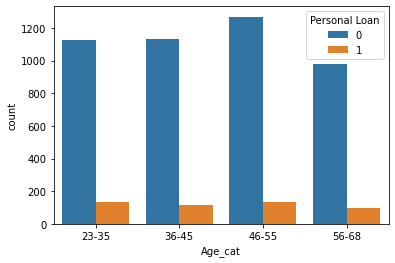

In [670]:
sns.countplot(data = df_data, x='Age_cat', hue='Personal Loan')

<AxesSubplot:xlabel='Personal Loan'>

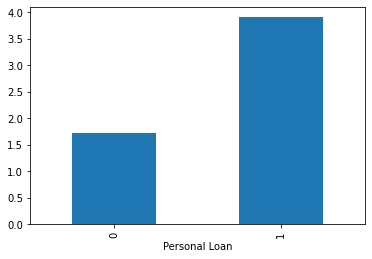

In [671]:
df_data.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Personal Loan'>

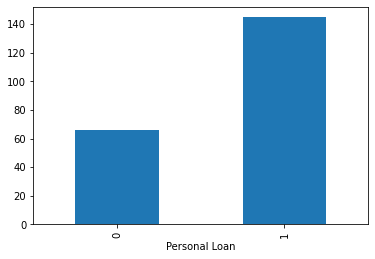

In [672]:
df_data.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

## EDA Observations:
+ More education more likelyhood to take loans
+ Bigger families take Personal loans
+ Customers with 'CD Account' tend to get personal loans
- Security Accounts, Credit Cards or Online -- do not represnt any high/low probability with getting personal loans
- Age is not a factor in getting personal loans 
+ More avergae credit cart users get loans
+ More income people get loans


### Get data model ready

In [673]:
df_data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_cat
0,25,49,4,1.6,1,0,0,1,0,0,0,23-35
1,45,34,3,1.5,1,0,0,1,0,0,0,36-45
2,39,11,1,1.0,1,0,0,0,0,0,0,36-45
3,35,100,1,2.7,2,0,0,0,0,0,0,23-35
4,35,45,4,1.0,2,0,0,0,0,0,1,23-35


In [674]:
df_data.head(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_cat
0,25,49,4,1.6,1,0,0,1,0,0,0,23-35
1,45,34,3,1.5,1,0,0,1,0,0,0,36-45


In [675]:
#data = df_data.drop(['Income','CCAvg', 'Age'], axis=1, inplace=False)
data = df_data.drop(['Age', 'Age_cat'], axis=1, inplace=False)

In [676]:
data.head(2)

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,49,4,1.6,1,0,0,1,0,0,0
1,34,3,1.5,1,0,0,1,0,0,0


### Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
    

In [677]:
X = data.drop(columns= ['Personal Loan'])
Y = data['Personal Loan']

In [678]:
X = pd.get_dummies(data = X, drop_first = True )

In [679]:
X.head(2)

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,49,4,1.6,1,0,1,0,0,0
1,34,3,1.5,1,0,1,0,0,0


In [680]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=7)

### Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [681]:
from sklearn.linear_model import LogisticRegression

model  = LogisticRegression(max_iter= 1000)

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [682]:
from sklearn.metrics import recall_score, roc_auc_score, classification_report,confusion_matrix


In [683]:
recall_score(Y_test,y_pred)

0.6159420289855072

In [684]:
roc_auc_score(Y_test,y_pred)

0.8013630849773351

In [685]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1362
           1       0.83      0.62      0.71       138

    accuracy                           0.95      1500
   macro avg       0.89      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [686]:
z = pd.DataFrame()                                               # creating a new dataframe

z['Actual'] = Y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = model.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = model.predict_proba(X_test)[:,1]

z['Predicted'] = model.predict(X_test) 

In [687]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No Default","Default"] , yticklabels = ["No Default","Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

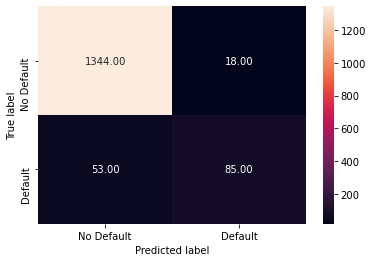

In [688]:
draw_cm( z['Actual'], z['Predicted'] )

### Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [689]:
z.head(5)

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.991742,0.008258,0
1,0,0.973065,0.026935,0
2,0,0.972820,0.027180,0
3,0,0.994084,0.005916,0
4,0,0.992276,0.007724,0


In [690]:
import statsmodels.api as sm

logit = sm.Logit( Y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary()

Optimization terminated successfully.
         Current function value: 0.133680
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Sat, 16 Jan 2021   Pseudo R-squ.:                  0.5823
Time:                        07:59:25   Log-Likelihood:                -467.88
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                3.371e-275
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.1443      0.658    -19.976      0.000     -14.434     -11.855
Income                 0.0516      0.003     17.257      0.000       0.046       0.057
Family                 0.7699      0.088      8.754      0.000       0.598       0.942
CCAvg                  0.1534      0.047      3.281      0.001       0.062       0.245
Education              1.6637      0.130     12.833      0.000       1.410       1.918
Mortgage               0.0006      0.001      0.998      0.318      -0.001       0.002
Securities Account    -0.8041      0.336     -2.395      0.017      -1.462      -0.146
CD Account             3.7028      0.389      9.526      0.000       2.941       4.465
Online                -0.5817      0.183     -3.177      0.001      -0.940      -0.223
CreditCard            -1.1838      0.238     -4.967      0.000      -1.651      -0.717
======================================================================================
"""

### For test data show all the rows where the predicted class is not equal to the observed class. 

In [691]:
err_df = X_test.copy()
err_df['Predicted'] = y_pred
err_df['Actual'] = Y_test

In [692]:
err_df.isna().sum()

Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Predicted             0
Actual                0
dtype: int64

In [693]:
err_df.nunique()

Income                153
Family                  4
CCAvg                  99
Education               3
Mortgage              206
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Predicted               2
Actual                  2
dtype: int64

In [694]:
err_df.head(2)

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Predicted,Actual
3406,34,3,2.0,3,0,0,0,0,1,0,0
757,81,3,1.8,2,0,1,0,0,0,0,0


In [695]:
err_df['prediction_error'] = np.where(err_df['Actual'] == err_df['Predicted'], False, True)
err_df

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Predicted,Actual,prediction_error
3406,34,3,2.0,3,0,0,0,0,1,0,0,False
757,81,3,1.8,2,0,1,0,0,0,0,0,False
3624,70,1,1.4,3,0,0,0,0,0,0,0,False
4544,80,3,2.5,1,0,0,0,1,0,0,0,False
3235,39,2,1.6,3,0,0,0,1,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
460,141,2,2.1,1,0,0,0,1,1,0,0,False
2492,134,2,3.1,1,0,0,0,1,0,0,0,False
3028,38,3,0.1,3,178,0,0,1,1,0,0,False
3437,39,4,0.7,2,0,1,0,1,0,0,0,False


<AxesSubplot:xlabel='prediction_error', ylabel='count'>

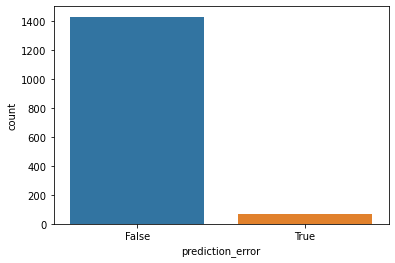

In [696]:
sns.countplot(data = err_df, x = 'prediction_error')

In [697]:
err_df['prediction_error'].value_counts()

False    1429
True       71
Name: prediction_error, dtype: int64

In [698]:

rslt_df = err_df[err_df['prediction_error']== True] 
  
rslt_df

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Predicted,Actual,prediction_error
4575,115,2,0.5,3,0,0,0,0,0,0,1,True
3383,135,3,4.1,1,213,0,0,1,0,0,1,True
459,200,2,3.0,1,458,0,0,0,0,1,0,True
2304,170,3,4.7,1,0,0,0,1,0,0,1,True
1731,125,3,2.4,1,0,0,0,1,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1499,91,1,4.3,2,0,0,1,1,1,0,1,True
927,95,3,3.7,2,138,0,0,0,1,0,1,True
3084,129,3,0.7,2,0,0,0,0,0,0,1,True
4163,108,4,1.9,2,0,0,0,1,0,0,1,True


### Give conclusion related to the Business undersreset_indexyour model? (5 marks)

####

- The model currency has a high accuracy of predicting the right value of more than 90 % 
- the model precision and recall is really good
- Also, the area under the curve is around 80% which is very good estimate of the model i.e, to calculate the prediction 